## Summary
The features 'Class', 'Type of Traveller', and 'Frequent Reviewer' are individually analysed in this notebook to identify patterns in different types of customers. Additionally, their interactions are displayed in a Tableau repository (https://public.tableau.com/app/profile/dan.coito/vizzes) to perform an initial segmentation of reviewers and find target groups. The main results and insights are highlighted in this summary, while a more detailed description is included at the beginning of each section.

The analysis of the 'Class' indicates that the 'Overall Rating' improves with each cabin, while the variability decreases. This translates into an increase of approximately 10% of recommended reviews per cabin. Focusing on enhancing the Economy Class experience while maintaining high standards in premium cabins could significantly improve overall customer satisfaction and airline reputation.

In terms of 'Type of Traveller', 'Solo Leisure' travellers are the most represented group and leave the best ratings and highest percentage of recommendations. In exchange, 'Family Leisure' travellers give the worst ratings, although there is not enough evidence to state that the difference with 'Business' travellers is statistically significant. Since one 'Family Leisure' review accounts for several passengers and these reviews offer the worst results, an initial suggestion would be to prioritize improving their experience, especially in First Class, where the rating and recommendation rates differences are the highest. Finally, customers travelling for business choose to do so in Businness class around 50% of the times. However, their ratings and recommendations are the lowest for this cabin. Since their needs and requests may be fairly unanimous, adressing this issue would be highly beneficial.

'Frequent reviewer' splits customers based on how many reviews they have posted. Customers that left 6 or more reviews (gold and platinum tiers) show outstanding ratings, recommending the airline around 90% of the times, even in Economy Class. In contrary, customers with only one review (blue tier) provide a percentage rate of recommendations of 43%, with over 50% of their overall ratings being of 4 or less. The differences are most pronounced in Economy Class. Analysing 'Blue tier reviews' could adress factors negatively affecting the customer experience, whereas 'Gold and Platinum tier reviews' can provide valuable information on which aspects are working well and could be replicated to improve customer satisfaction.

## Libraries

In [1]:
import pandas as pd # Data manipulation
import numpy as np # Data manipulation
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
sns.set() # Setting default Seaborn style for visualizations
import scipy.stats as stats # Statistical tests
import scikit_posthocs as sp # Post-hoc analysis for non-parametric tests

## Functions
Some tasks are performed repeatedly throughout the analysis. Reusable functions have been created to avoid code repetition and allow the notebook to focus on analysis. These functions are defined and explained in detail in the 'eda_utils.py' script contained in the 'src/functions' directory within this repository (https://github.com/DandeLC/Airline-Reviews-Sentiment-Analysis/blob/main/src/functions/eda_utils.py). The following code allows to import them from the script.

In [2]:
import sys
import os

# Add the path to the src directory
sys.path.append(os.path.abspath(os.path.join('..', 'src', 'functions')))

# Importing the functions from the script
from eda_utils import normality_check, kruskal, plot_percentage, traveller_type

## Data

The cleaned dataset with engineered features containing only verified reviews is stored in the 'data/interim' directory within this repository. The path has been included to run the code without further modifications.

In [4]:
df= pd.read_csv('../data/interim/airlines_verified.csv', index_col = 0)

In [5]:
df.head(3)

,Title,Reviews,Frequent Reviewer,Verified,Airline,Class,Type of Traveller,Route,Review Date,Flight Year,Flight Month,Quick Review,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Flight was amazing. The crew onboard this fl...,0,1,Singapore Airlines,Business Class,Solo Leisure,Jakarta to Singapore,2024-03-01,2023,12,0,4,4,4,4,4,9,1
1,seats on this aircraft are dreadful,Booking an emergency exit seat still meant h...,1,1,Singapore Airlines,Economy Class,Solo Leisure,Phuket to Singapore,2024-02-21,2024,2,1,5,3,4,4,1,3,0
2,Food was plentiful and tasty,Excellent performance on all fronts. I would...,2,1,Singapore Airlines,Economy Class,Family Leisure,Siem Reap to Singapore,2024-02-20,2024,2,1,1,5,2,1,5,10,1


## 'Class'
A First Class (Business Class) ticket typically costs over ten times (five times) more than an Economy class ticket. From a business perspective, it is logical to prioritize higher standards and service quality in premium cabins. The analysis of the 'Class' feature supports these assumptions. 

The descriptive statistics and box plot indicate that the 'Overall Rating' improves with each cabin, while the variability decreases. A Kruskal-Wallis H test and subsequent post-hoc Dunn's test revealed that these differences are statistically significant at the 5% significance level for all pairs of classes. This translates into an increase of approximately 10% of recommended reviews per cabin. 

To enhance their reputation, airlines should focus on improving the Economy Class experience, since those customers make up around 68% of total reviewers but recommended the airline only 45% of the times. Although results are better in premium cabins, they are far from being outstanding. Quality standards should, at least, be maintained in those cabins to ensure retention of the highest paying customers.

Premium Economy and especially First Class results should be evaluated taking into account the small amount of reviews included in the dataset. While in big aircrafts Economy Class can have around 300 passengers, a maximum of usually 10 customers fit in a First Class cabin. The imbalance in reviews' number in the dataset represents the reality of flights and can benefit the analysis. Economy Class should be treated as a group, analysing the overall preferences and acting in accordance. First Class, in exchange, is a very personal cabin, hence each individual opinion should hold a bigger relevance.

### 'Overall Rating'
Descriptive statistics are calculated for 'Overall Rating' across Classes and a box plot is displayed to visualize the results and dispersion. Both of them indicate that the average scoring increases with each cabin, from 5.1 in Economy Class to 7.6 in First Class. The standard deviation gets smaller when the class improves, except between Premium Economy and Business Class. The Box plot, however, displays a generally more concentrated opinion even between those two classes.

                  count      mean       std  min  25%  50%   75%   max
Class                                                                 
Economy Class    4239.0  5.100731  3.587838  1.0  1.0  5.0   9.0  10.0
Premium Economy   281.0  6.046263  3.152323  1.0  3.0  7.0   9.0  10.0
Business Class   1610.0  6.625466  3.197377  1.0  4.0  8.0   9.0  10.0
First Class        87.0  7.597701  2.982350  1.0  6.0  9.0  10.0  10.0


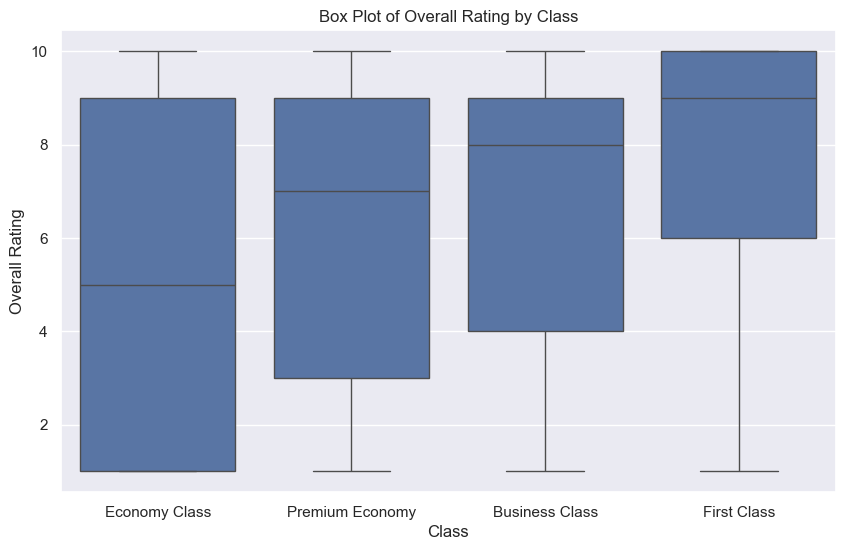

In [6]:
# Define the desired order
class_order = ['Economy Class', 'Premium Economy', 'Business Class', 'First Class']

# Convert 'Class' to a categorical type with the specified order
df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)

# Descriptive statistics for 'Overall Rating' by 'Class'
summary_stats = df.groupby('Class', observed = True)['Overall Rating'].describe()
print(summary_stats)

# Box Plot of Overall Rating by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Overall Rating', data=df)
plt.title('Box Plot of Overall Rating by Class')
plt.xlabel('Class')
plt.ylabel('Overall Rating')
plt.show()

#### Statistical test
Statistical tests are performed to verify if the observed differences across classes are statistically significant.

##### Normality check
The 'Normality Assumption' is tested to identify which test is adequate for the data. A Shapiro-Wilk Test for 'Overall Rating' distribution of each class is performed and the Q-Q plots are displayed. Both procedures are done by the 'normality_check' function imported from the 'eda_utils.py' script. The p-values of 0.000 from the tests and the Q-Q plots indicate the non-normal nature of the distributions.

Shapiro-Wilk Test for Overall Rating for Business Class: Statistic=0.855, p-value=0.000
Shapiro-Wilk Test for Overall Rating for Economy Class: Statistic=0.835, p-value=0.000
Shapiro-Wilk Test for Overall Rating for Premium Economy: Statistic=0.896, p-value=0.000
Shapiro-Wilk Test for Overall Rating for First Class: Statistic=0.781, p-value=0.000


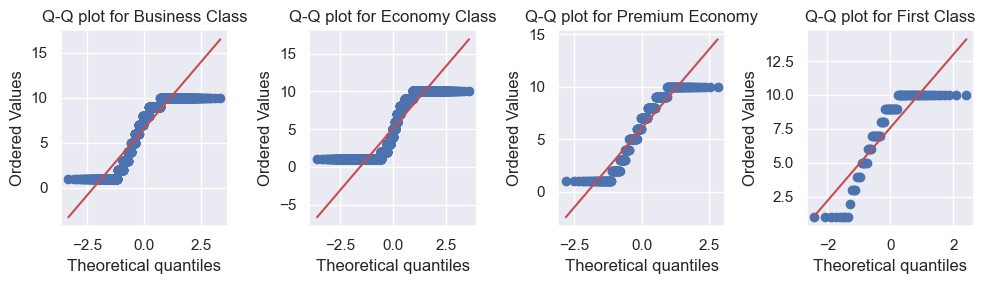

In [7]:
# Displaying Shapiro-Wilk test and Q-Q plots with 'normality_check' function
normality_check(1,4,'Class','Overall Rating',df)

##### Kruskal-Wallis H test
Due to the number of distributions and their non-normality, a non-parametric test such as Kruskal-Wallis H test is appropriate. It is performed by the function kruskal, imported from 'eda_utils.py' script, which compares the distributions of 'Overall Rating' across classes. The p-value of 0.000 suggests that the differences in distributions are statistically significant.

In [8]:
# Performing Kruskal-Wallis H test with 'kruskal' function
kruskal('Class','Overall Rating',df)

Kruskal-Wallis Test Results:
Statistic=238.027, p-value=0.000


##### Post-hoc test
After the Kruskal-Wallis rejection, a post-hoc Dunn's test is performed to compare each pair of groups. To control the Family-Wise Error Rate (FWER) and maintain a high statistical power during multiple comparisons, the p-values of the test are adjusted using the Holm-Bonferroni procedure.

At a significance level of 5%, the adjusted p-values indicate that the differences between all pairs of classes are statistically significant.

In [9]:
# Dunn's Test
dunn_results = sp.posthoc_dunn(df, val_col='Overall Rating', group_col='Class', p_adjust='holm')

print(dunn_results.round(4))

                 Economy Class  Premium Economy  Business Class  First Class
Economy Class           1.0000           0.0002          0.0000       0.0000
Premium Economy         0.0002           1.0000          0.0132       0.0004
Business Class          0.0000           0.0132          1.0000       0.0132
First Class             0.0000           0.0004          0.0132       1.0000


### Recommended percentage
It is natural to analyse how the differences in 'Overall Rating' across classes translate into recommendations. The percentage bar chart displayed below, performed by the function 'plot_percentage' imported from the 'eda_utils' script, shows an increase of recommended reviews in every cabin. The highest gap is between Economy Class and Premium Economy (13%) and the smallest one between Premium Economy and Business Class (8%).

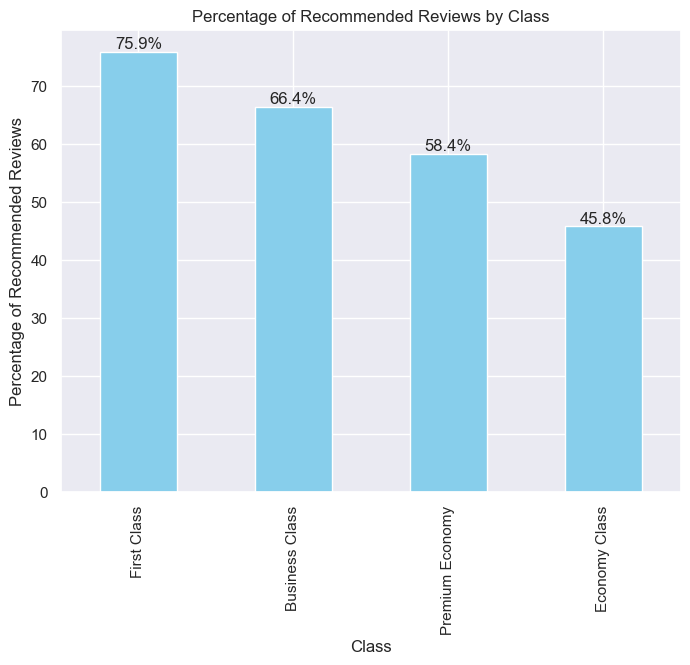

In [10]:
# Plotting percentage of recommended reviews per class with 'plot_percentage' function
plot_percentage('Class', 'Recommended',df)

## Type of Traveller
The dataset's 'Type of Traveller' feature allows to split different reviewers based on them travelling for leisure or business, and whether they are accompanied or not.

'Solo Leisure' travellers are the most represented type of reviewer and they have the best average 'Overall Rating' (5.99). The differences are statistically significant with every other group, and this translates into the highest percentage of recommendations (58%). Since they will usually have less needs and simpler requests, it seems logical that they provide the best ratings.

'Couple Leisure' and 'Business' reviewers results seem to be fairly similar. Couples represent 23% of the reviews left, while 'Business' travellers are the least represented type with only 17.5%. The average rating for both groups is 5.5 and 5.3, respectively. The post-hoc Dunn's test shows that the differences between both groups are not statistically signficant. This pattern extends to the percentage of recommendations, where couples recommend the airline 49.4% of the times and 'Business' travellers 49.5%. 

Finally, families are the second least represented group (18.6%). They give the worst average score (4.98) and the lowest percentage of recommendations (44.6%). The differences are statistically significant with solo travellers and couples, however, there is not enough evidence to suggest that they are different to business travellers' ones. Including further features in the analysis might help clarify this result.

From a business perspective it is important to highlight that, while single travellers are the most represented reviewers, this does not imply that they represent more customers. A ‘Couple Leisure’ review will represent two individual customers, while ‘Family Leisure’ will usually represent three or more customers. Attending to the percentages, both ‘Couple Leisure’ and ‘Family Leisure’ reviews represent a higher number of customers than ‘Solo Leisure’. Since the aim of this project is to enhance customer satisfaction and retention, focusing on improving couples and especially families’ experiences would translate in the biggest number of customers affected. While the improvements would not reflect that much in terms of the reviews, they would be reflected in real life.

### EDA
Descriptive statistics are calculated for 'Overall Rating' across 'Type of Traveller' and a Box plot is displayed to assist in visualization. A pie chart represents then the percentage of each type of traveller for all reviews, and the bar chart shows the percentage of reviews for each type that are finally recommended. This analysis is performed by the function 'traveller_type' imported from the 'eda_utils' script. The function is properly documented in the mentioned script, with a link to it included under the 'Functions' section in the top of this notebook.

Descriptive statistics of Type of traveller in All Classes

                     count      mean       std  min  25%  50%  75%   max
Type of Traveller                                                      
Business           1085.0  5.322581  3.407867  1.0  2.0  5.0  9.0  10.0
Couple Leisure     1443.0  5.498267  3.452144  1.0  2.0  6.0  9.0  10.0
Family Leisure     1154.0  4.980936  3.661238  1.0  1.0  4.0  9.0  10.0
Solo Leisure       2535.0  5.992899  3.528096  1.0  2.0  7.0  9.0  10.0


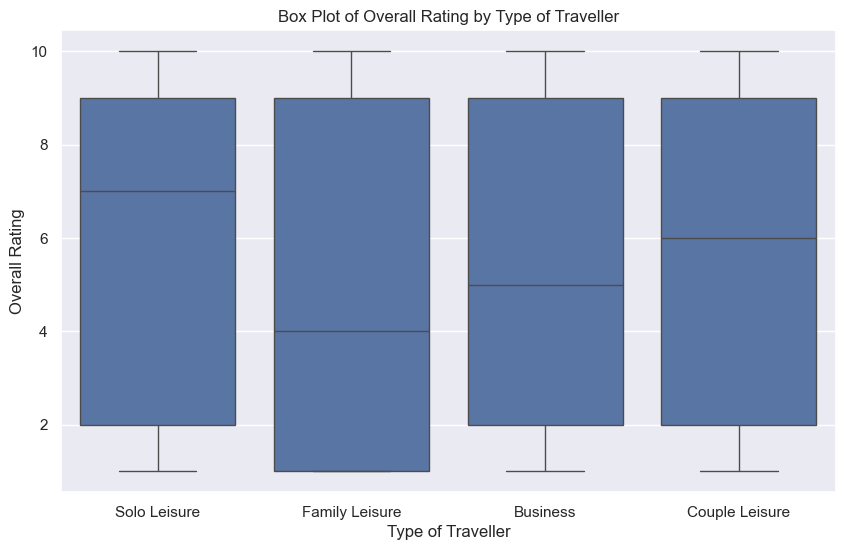

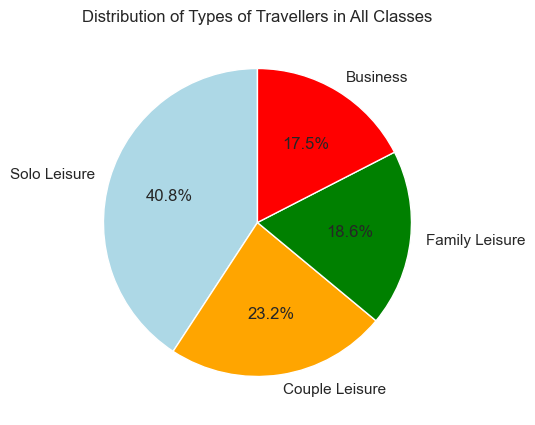

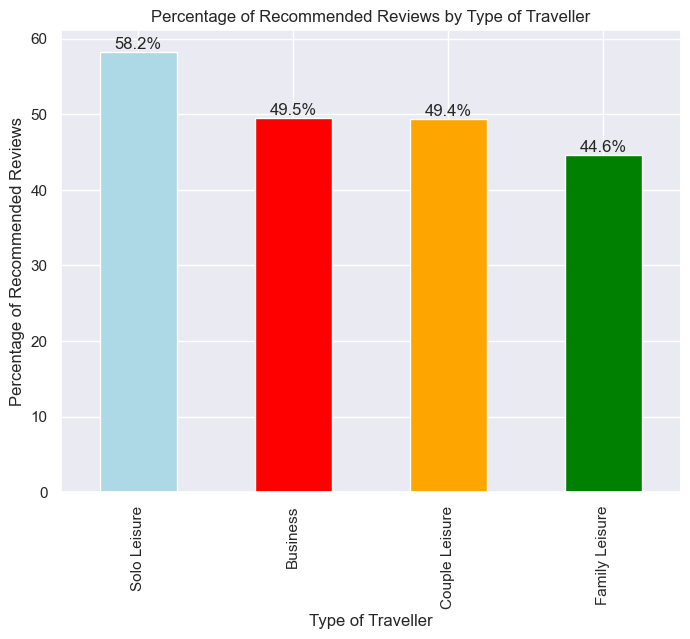

In [11]:
# EDA for Type of Traveller attending to all the Classes
traveller_type('All Classes',df)

### Statistical Test
Statistical tests are performed to verify if the observed differences across classes are statistically significant. Since the procedure is identical as with the 'Class' feature, only the results will be commented.

#### Normality Check
The p-values of 0.000 of the Shapiro-Wilk test and the Q-Q plots indicate non-normal distributions, hence a non-parametric test is appropriate for assessing the differences between them.

Shapiro-Wilk Test for Overall Rating for Solo Leisure: Statistic=0.840, p-value=0.000
Shapiro-Wilk Test for Overall Rating for Family Leisure: Statistic=0.818, p-value=0.000
Shapiro-Wilk Test for Overall Rating for Business: Statistic=0.868, p-value=0.000
Shapiro-Wilk Test for Overall Rating for Couple Leisure: Statistic=0.864, p-value=0.000


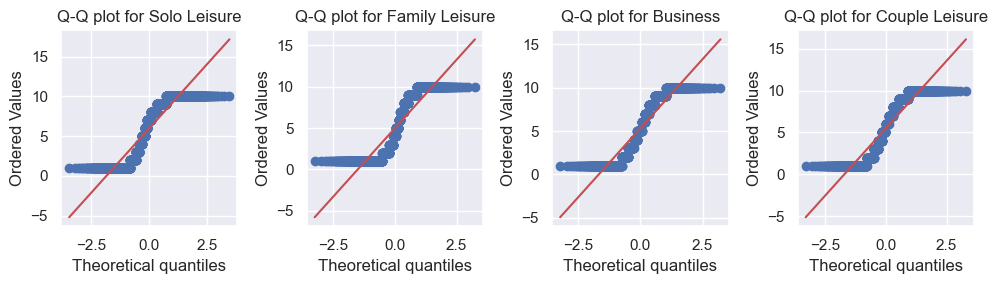

In [12]:
# Displaying Shapiro-Wilk test and Q-Q plots with 'normality_check' function
normality_check(1,4,'Type of Traveller','Overall Rating',df)

#### Kruskal-Wallis H test
The p-value of 0.000 suggests that there are differences among the distributions that are statitically significant.

In [13]:
# Performing Kruskal-Wallis H test with 'kruskal' function
kruskal('Type of Traveller','Overall Rating',df)

Kruskal-Wallis Test Results:
Statistic=69.249, p-value=0.000


#### Post-Hoc test
After the rejection of Kruskal-Kallis H test, a post-hoc Dunn's test with the p-values adjusted using the Holm-Bonferroni method is performed for multiple comparisons. 

At a significance level of 5%, the adjusted p-values indicate that the differences between 'Solo Leisure' and the rest of groups are statistically significant and between 'Business' and 'Couple Leisure' they are not. While there is enough evidence to accept that the difference between 'Family Leisure' and 'Couple Leisure' is significant, there is not enough evidence to state the same for 'Family Leisure' and 'Business'.

In [14]:
# Dunn's Test
dunn_results = sp.posthoc_dunn(df, val_col='Overall Rating', group_col='Type of Traveller', p_adjust='holm')

print(dunn_results.round(4))

                Business  Couple Leisure  Family Leisure  Solo Leisure
Business          1.0000          0.1749          0.0925        0.0000
Couple Leisure    0.1749          1.0000          0.0013        0.0002
Family Leisure    0.0925          0.0013          1.0000        0.0000
Solo Leisure      0.0000          0.0002          0.0000        1.0000


## Frequent reviewer
This feature was engineered based on the amount of reviews each customer left, aiming to represent their flying frequency.  While it offers some insights, it also introduces a significant limitation that can not be ignored. For higher tiers of this feature, it is reasonable to assume that customers who leave a lot of reviews are indeed frequent flyers. However, this assumption can not be made for lower tiers. It can not be granted that a customer who left only one review has not taken many more flights but decided to leave just that one review. 

From the descriptive statistics and the box plot, it can be observed that most negative reviews are left by customers submitting only one review. While at least 50% of reviews from other groups have an 'Overall Rating' of 8 or more, 'Blue Tier reviews' have over 50% with a rating of 4 or less. 

In terms of percentage of recommendations, the difference is even more pronounced. 'Blue tier reviewers' (tier 0) only recommend 43% of the times. In contrast, 'Silver tier reviewers' (those who left between 2 and 5 reviews or tier 1) increase their recommendation rate to nearly 73%. Finally, customers leaving more than 5 reviews (Gold and Platinum tier) recommend the airline in an outstanding 90% of the times.

Despite the limitation described above, an interesting insight can be made: customers that left many reviews are generally satisfied with the service, indicating that retention is not a significant issue for these groups. Focus should be mainly put on 'Blue tier reviewers' to adress factors affecting negatively their experience. In contrast, 'frequent reviewers' can provide valuable information on what aspects are working well and could be replicated to improve customer satisfaction.

### Descriptive Statistics and Box plot

                    count      mean       std  min  25%  50%    75%   max
Frequent Reviewer                                                        
0                  4607.0  4.998481  3.572917  1.0  1.0  4.0   9.00  10.0
1                  1097.0  7.000000  3.052760  1.0  5.0  8.0  10.00  10.0
2                   340.0  7.852941  2.275071  1.0  7.0  8.0   9.25  10.0
3                   173.0  7.352601  2.238006  1.0  6.0  8.0   9.00  10.0


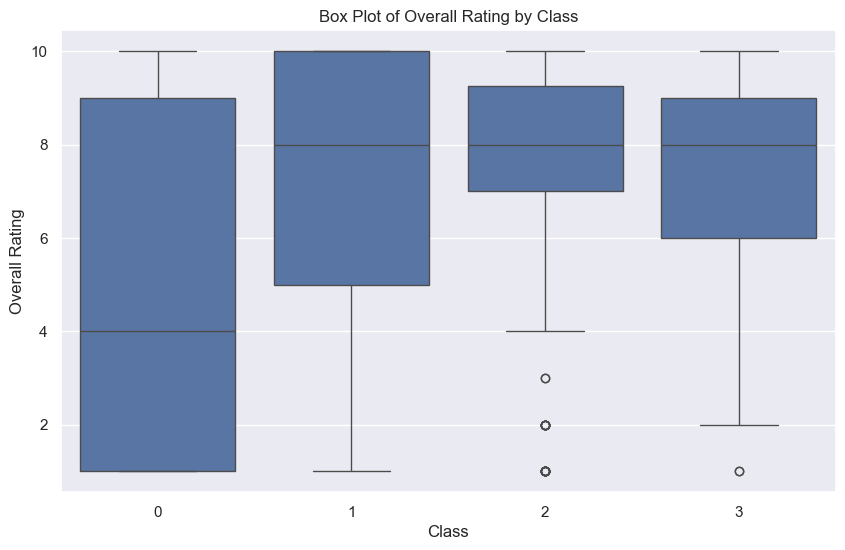

In [15]:
# Descriptive statistics for 'Overall Rating' by 'Frequent Reviewer'
summary_stats = df.groupby('Frequent Reviewer')['Overall Rating'].describe()
print(summary_stats)

# Box Plot of Overall Rating by 'Frequent Reviewer'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Frequent Reviewer', y='Overall Rating', data=df)
plt.title('Box Plot of Overall Rating by Class')
plt.xlabel('Class')
plt.ylabel('Overall Rating')
plt.show()

### Percentage of recommended reviews by 'Frequent Reviewer'

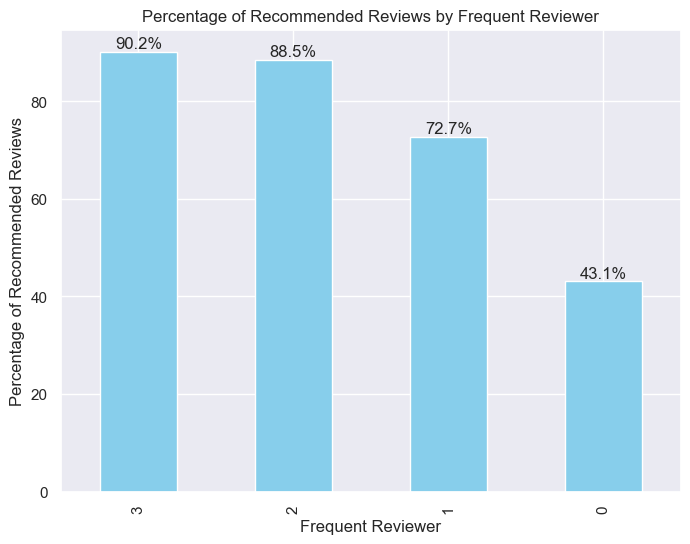

In [16]:
# Plotting percentage of recommended reviews by 'Frequent Reviewer' with 'plot_percentage' function
plot_percentage('Frequent Reviewer', 'Recommended',df)